# Dự án Tối ưu hoá Giá

In [1]:
# Nhập các thư viện
import pandas as pd, numpy as np, statsmodels.api as sm, matplotlib.pyplot as plt, seaborn as sns; sns.set(style="ticks", color_codes=True)
from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Cho phép hiển thị nhiều kết quả trong cùng một ô
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Bỏ qua tất cả các cảnh báo
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### Tải và Khám phá Dữ liệu

In [5]:
sales = pd.read_csv('../data/Cafe - Sell Meta Data.csv')
transactions = pd.read_csv('../data/Cafe - Transaction - Store.csv')
date_info = pd.read_csv('../data/DateInfo.csv')

#### Tập dữ liệu Bán hàng

In [6]:
sales.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

#### Tập dữ liệu Giao dịch

In [7]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [8]:
transactions.describe()
transactions.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


Lưu ý quan trọng: Giả định rằng giá (PRICE) của một sản phẩm trong cùng một ngày là không thay đổi.

Chi tiết:

CALENDAR_DATE: một biến kiểu ngày/giờ, với thời gian luôn được đặt là 00:00 sáng.

PRICE: một biến số, thể hiện giá của sản phẩm được xác định bởi SELL_ID.

QUANTITY: một biến số, thể hiện số lượng sản phẩm đã bán, được xác định bởi SELL_ID.

SELL_ID: một biến phân loại, dùng để định danh sản phẩm đã bán.

SELL_CATEGORY: một biến phân loại, thể hiện danh mục của sản phẩm đã bán.

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

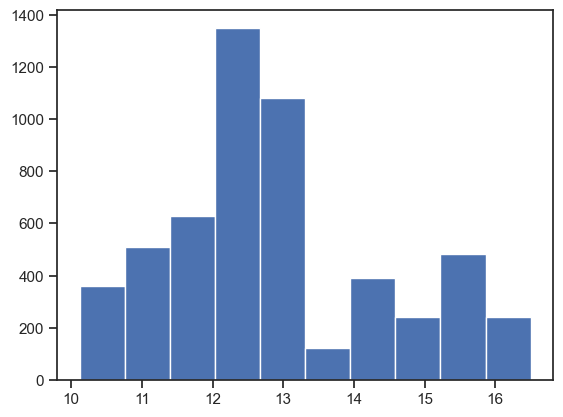

In [9]:
plt.hist(transactions.PRICE)

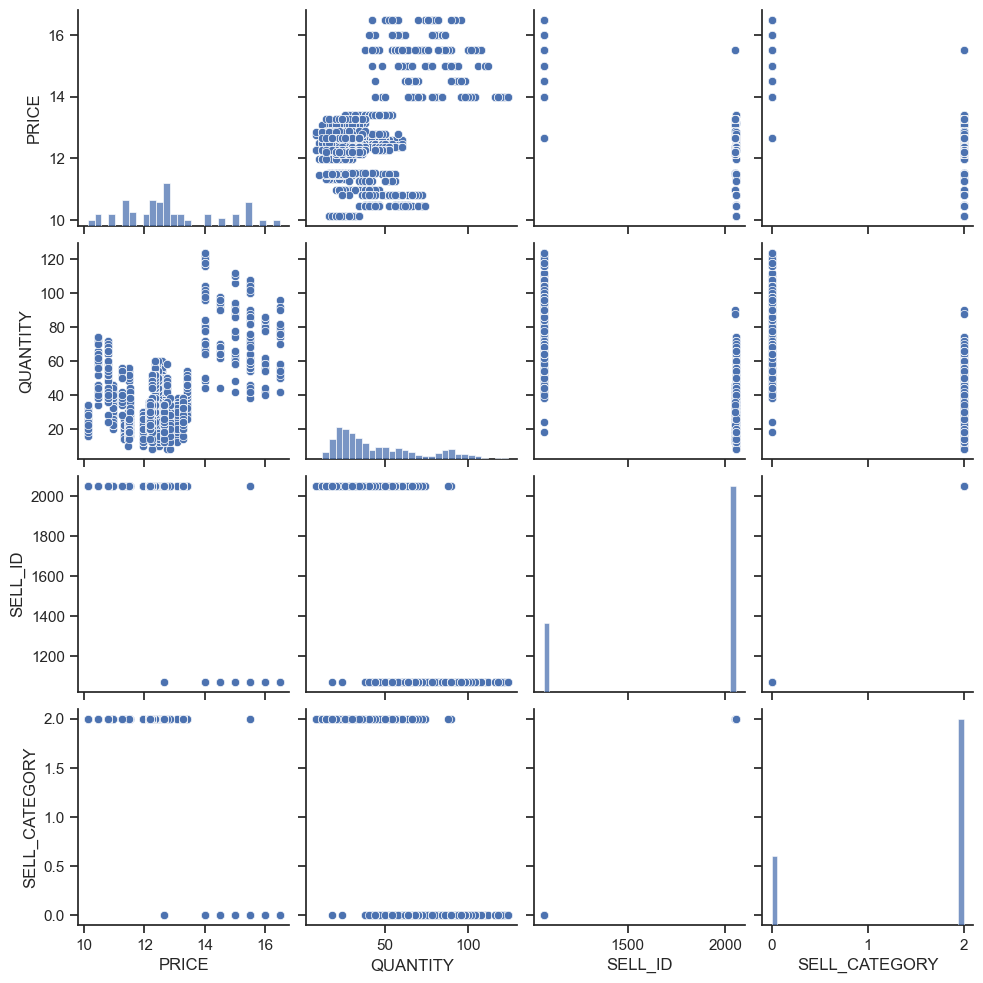

In [10]:
sns.pairplot(transactions)

#### Date Info Dataset

In [11]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [12]:
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [13]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [14]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,NaN,1,0,75.2,1
1345,9/7/15,2015,NaN,0,0,77.0,1
1346,9/8/15,2015,NaN,0,0,73.4,1
1347,9/9/15,2015,NaN,0,0,71.6,1


In [15]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [16]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,No Holiday,1,0,75.2,1
1345,9/7/15,2015,No Holiday,0,0,77.0,1
1346,9/8/15,2015,No Holiday,0,0,73.4,1
1347,9/9/15,2015,No Holiday,0,0,71.6,1


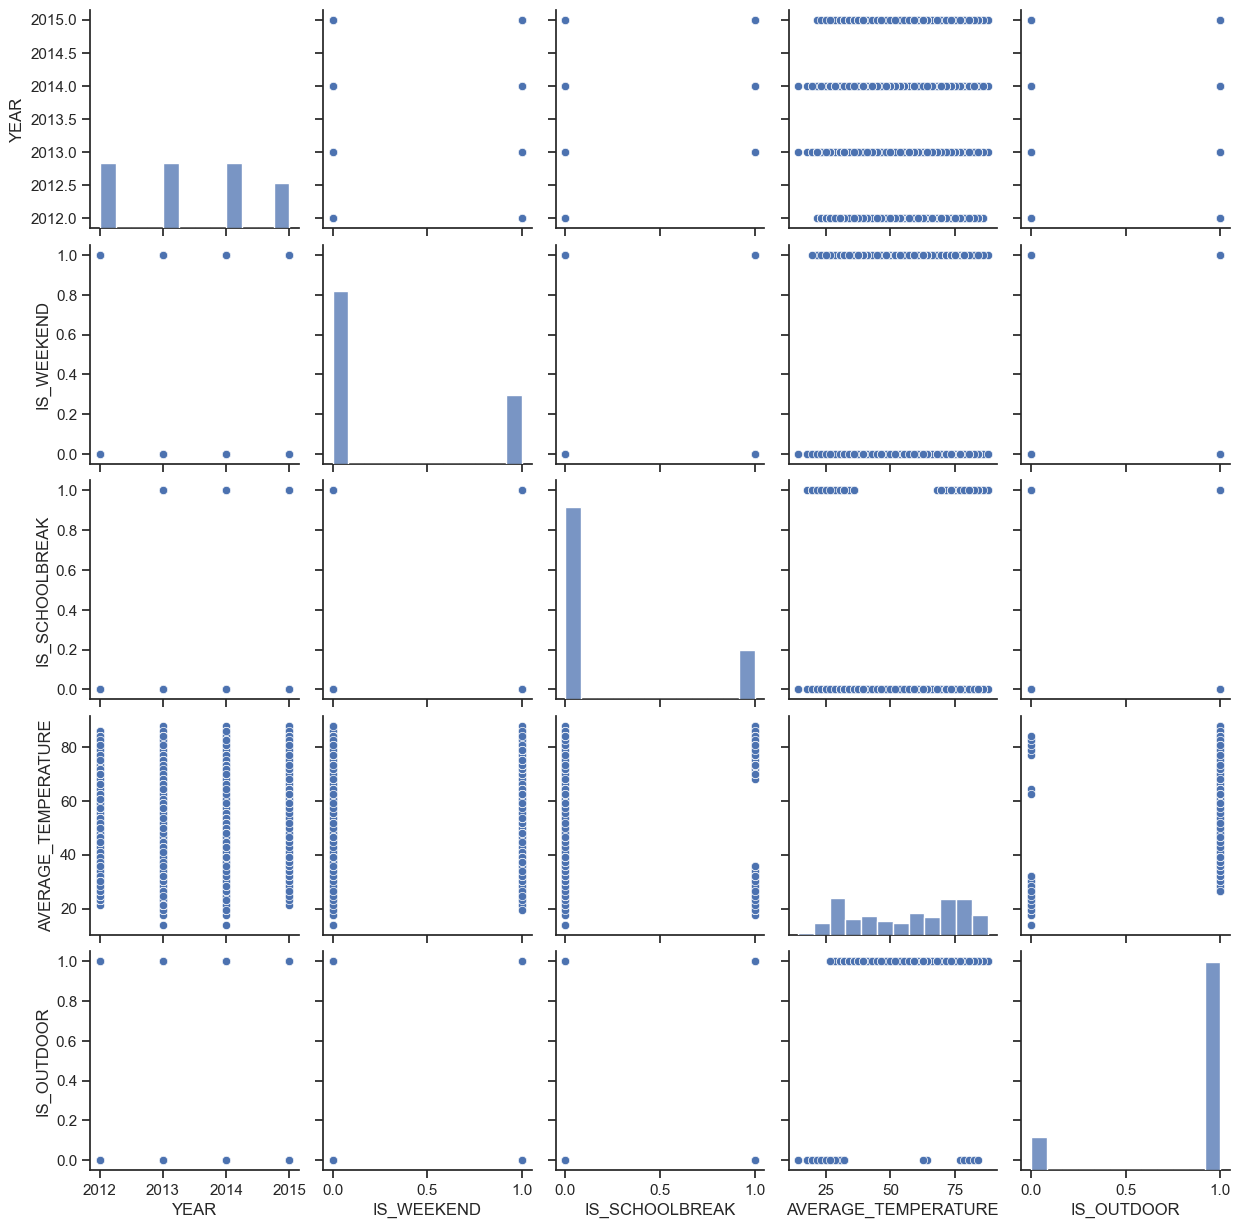

In [17]:
sns.pairplot(date_info)

#### More Data Analysis

In [18]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [19]:
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [20]:
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [21]:
date_info.shape

(1349, 7)

In [22]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


## Combine datasets

In [23]:
pd.concat([sales.SELL_ID, pd.get_dummies(sales.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,True,False,False,False
1,3055,False,True,False,False
2,3067,False,False,True,False
3,3028,False,False,False,True
4,2051,True,False,False,False
5,2051,False,False,True,False
6,2052,True,False,False,False
7,2052,False,False,False,True
8,2053,True,False,False,False
9,2053,False,False,True,False


In [24]:
pd.concat([sales.SELL_ID, pd.get_dummies(sales.ITEM_NAME)], axis=1).groupby(sales.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [25]:
data1 = pd.merge(sales.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
data1columns = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [26]:
data1columns

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50    46
                                   01/01/13       15.50    60
                                   01/01/14       15.50    72
                                   01/01/15       14.00    66
                                   01/02/12       15.50    70
                                                           ..
2053     2              COKE       9/29/13        10.45    40
                                   9/29/14        12.77    46
                                   9/30/12        12.42    38
                                   9/30/13        10.45    38
                                   9/30/14        12.77    50
Name: QUANTITY, Length: 10792, dtype: int64

In [27]:
data1.shape
intermediate_data = data1columns.reset_index()

(10808, 6)

In [28]:
data1.shape

(10808, 6)

In [29]:
data1columns.shape

(10792,)

In [30]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [31]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [32]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [33]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


In [34]:
combined_data.shape

(6696, 12)

In [35]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [36]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1])

array([0, 1])

In [37]:
#(BAU - Business As Usual)
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [38]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


In [39]:
bau_data.shape

(3768, 12)

In [40]:
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0])

array([0])

In [41]:
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [42]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

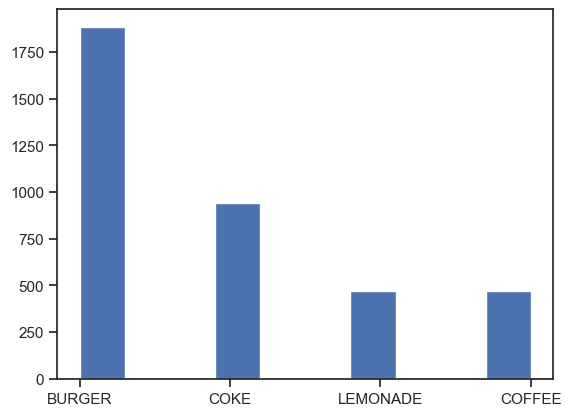

In [43]:
# More Exploratory Data Analysis
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

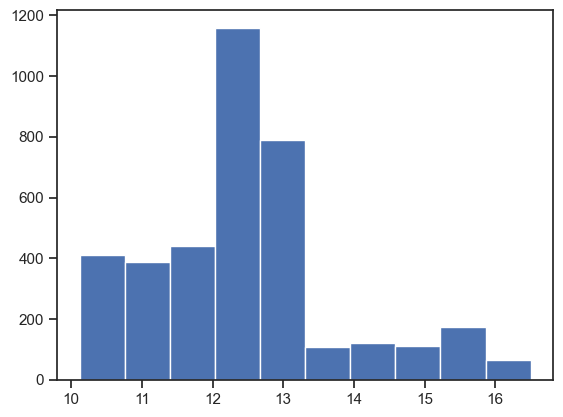

In [44]:
plt.hist(bau_data.PRICE)

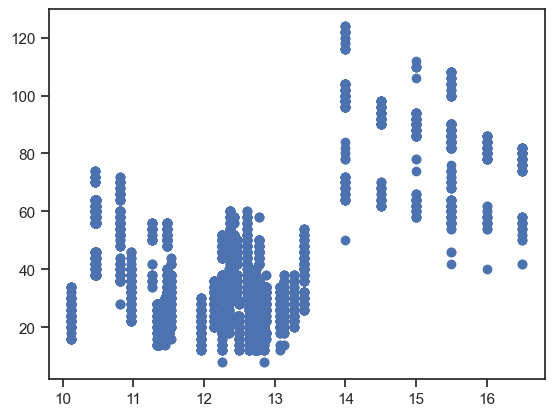

In [45]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

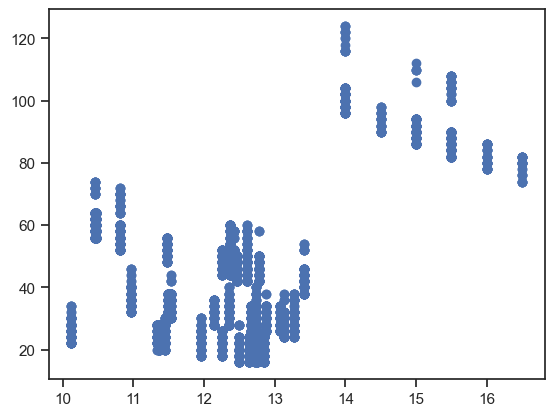

In [67]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

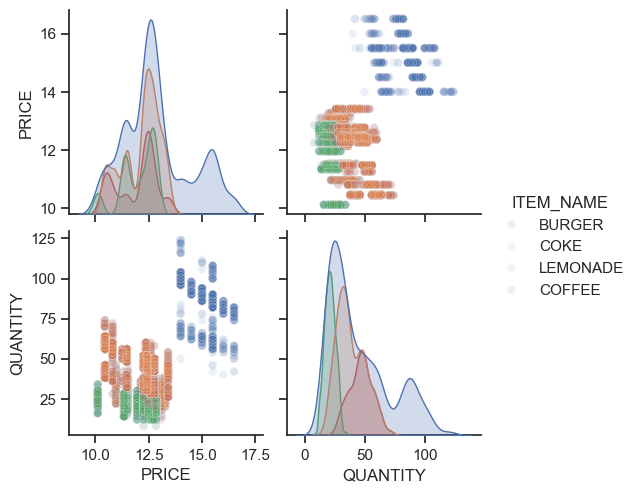

In [68]:
#(Trái trên cùng, tung là giá. hoành quanity)

sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

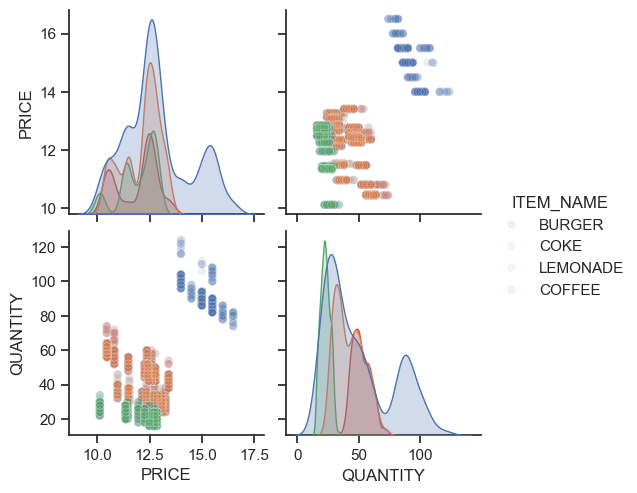

In [69]:
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

### Biểu đồ mật độ của giá có hai đỉnh (bimodal). Các biểu đồ cho thấy rằng với mọi mức số lượng, khi giá tăng thì số lượng bán ra giảm. Mặc dù 'coke' bị ẩn, chúng ta vẫn có thể tính được độ co giãn của giá đối với mặt hàng này.

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


(3348, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

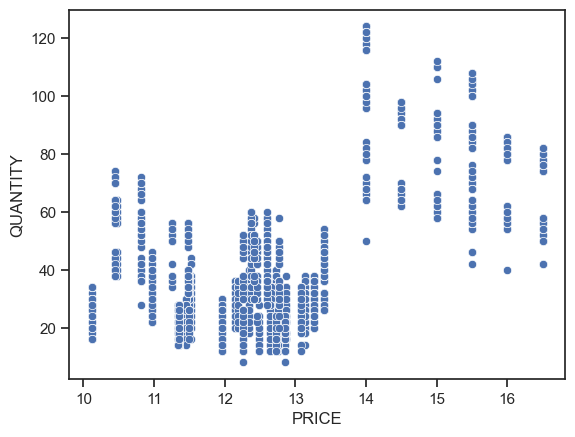

In [70]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

### Từ biểu đồ phân tán ở trên, có thể thấy rõ rằng có nhiều loại burger khác nhau đang được bán. Vì vậy, hãy xem xét lại phân bố này khi chúng ta phân biệt theo 'SELL_ID', yếu tố cho biết liệu burger đó có nằm trong combo hay không; nếu có, thì cần được xử lý riêng biệt.

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

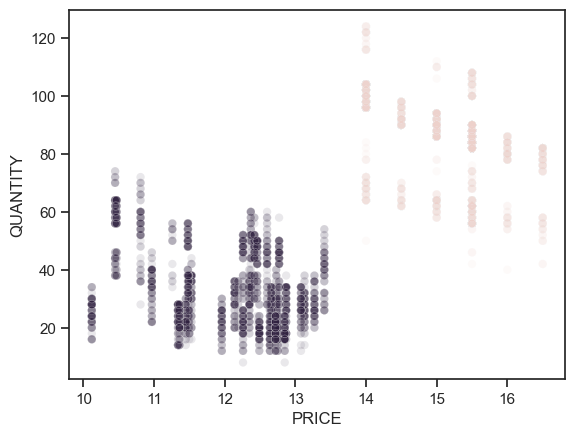

In [71]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [72]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [73]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2])

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

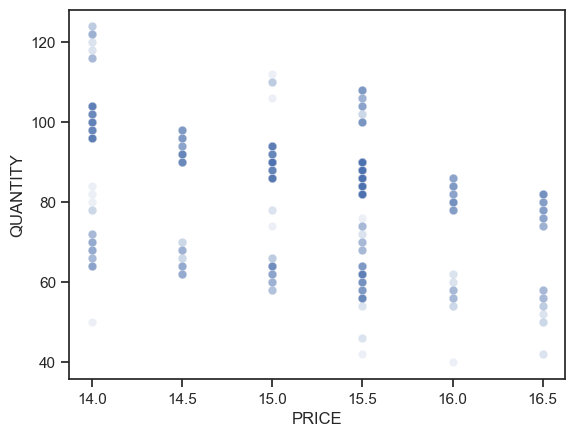

In [74]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

# Modeling

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.45e-32
Time:                        17:43:28   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

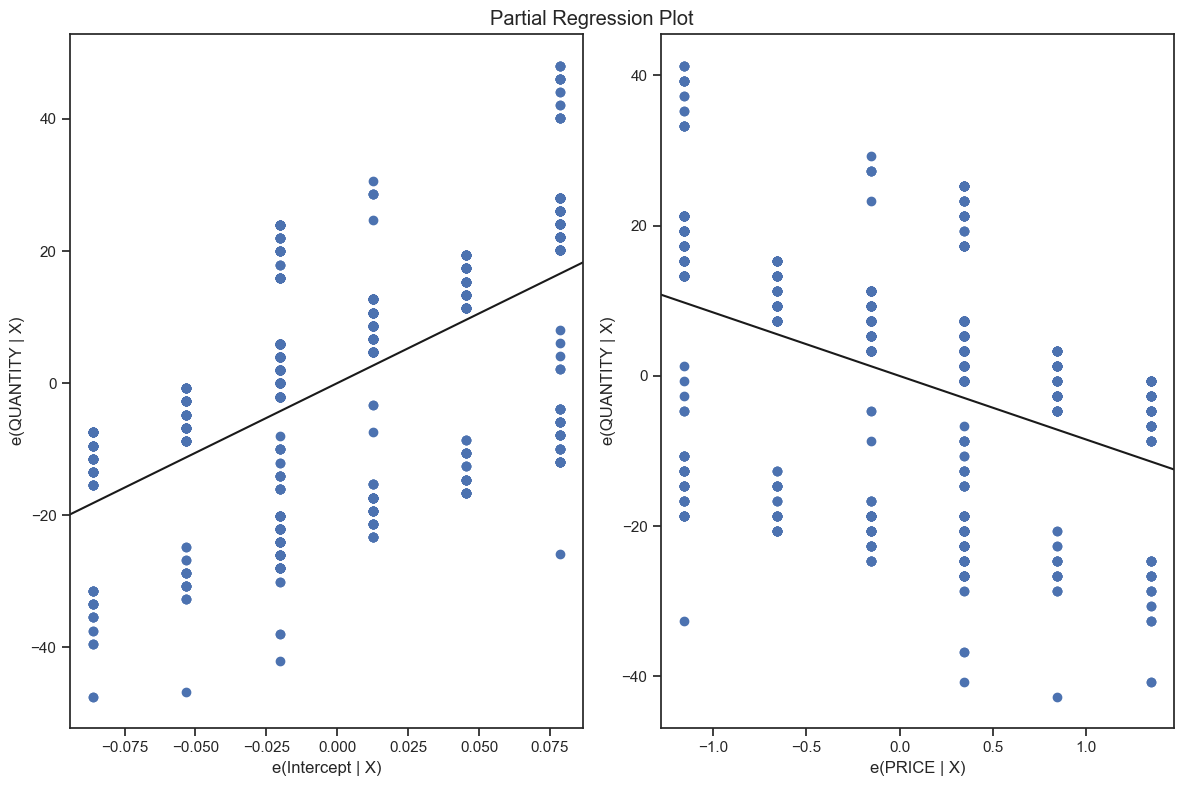

In [75]:

burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


(1884, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.0,1884.000000,1884.000000
mean,1806.500000,1.500000,12.830340,49.562633,2013.186837,0.0,0.0,53.691720,0.883227
std,425.331956,0.866255,1.567257,27.309516,1.058620,0.0,0.0,18.721922,0.321235
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,40.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

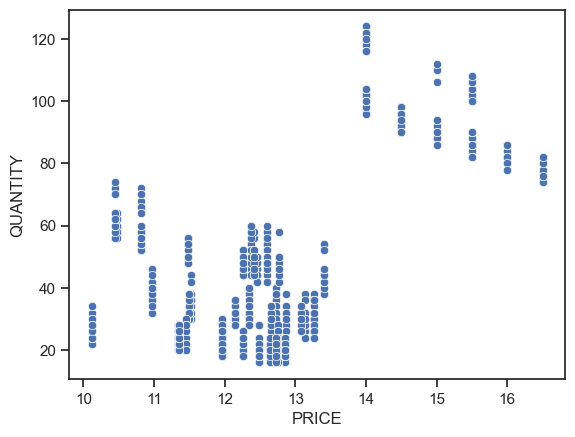

In [76]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

In [77]:
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053])

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,471.0,471.0,471.000000,471.000000,471.000000,471.0,471.0,471.000000,471.000000
mean,1070.0,0.0,15.124204,91.622081,2013.186837,0.0,0.0,53.691720,0.883227
std,0.0,0.0,0.705577,9.437897,1.059464,0.0,0.0,18.736854,0.321491
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1070.0,0.0,14.500000,86.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,1070.0,0.0,15.500000,90.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,1070.0,0.0,15.500000,98.000000,2014.000000,0.0,0.0,70.700000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

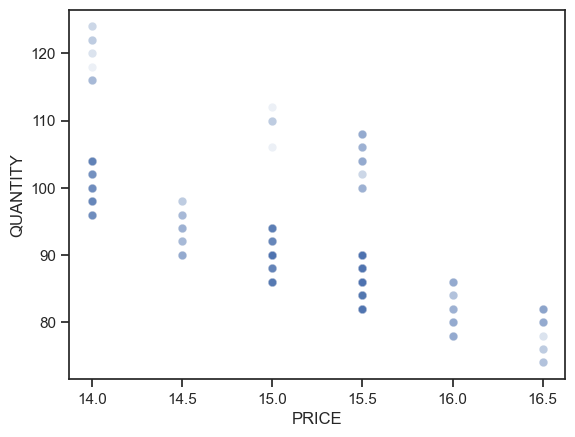

In [78]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

### Như chúng ta có thể thấy, biểu đồ phân tán trông rõ ràng hơn nhiều. Tuy nhiên có hai xu hướng riêng biệt.

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Wed, 07 May 2025   Prob (F-statistic):           7.16e-70
Time:                        17:43:46   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

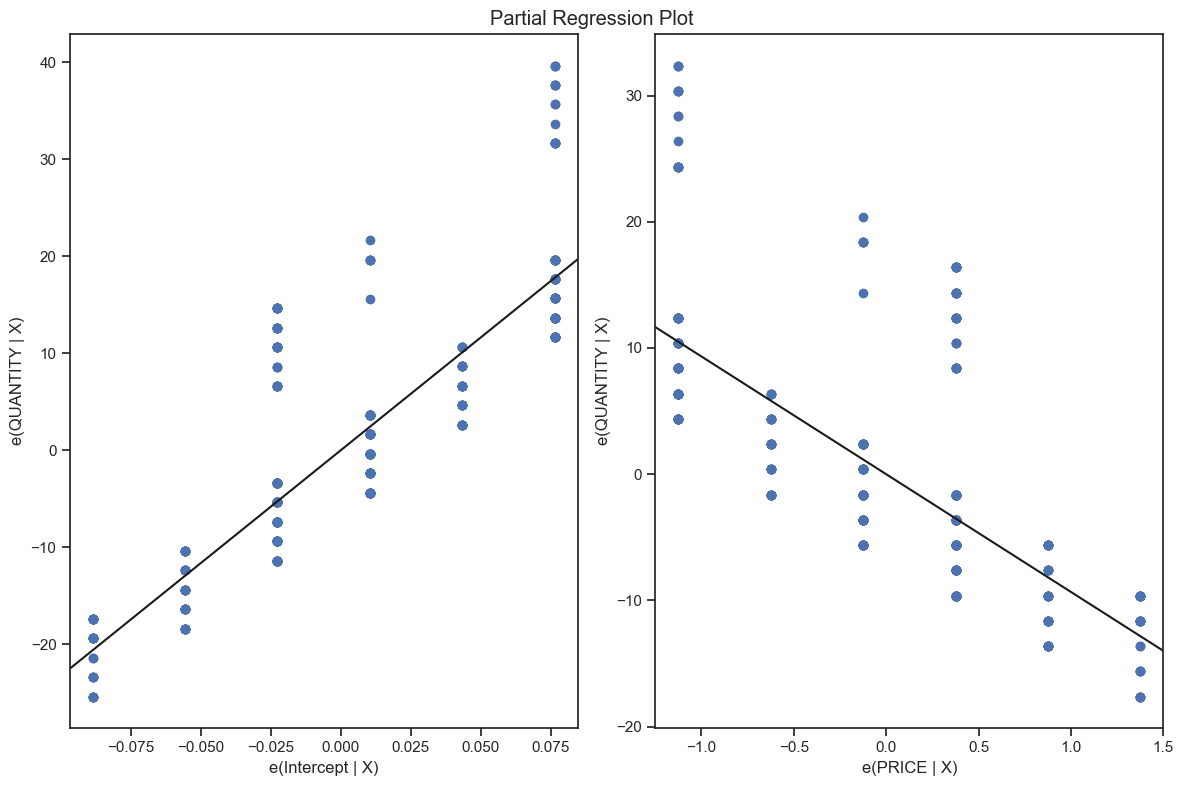

In [79]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

### Xem lại baudata để xem còn gì để tăng độ chính xác không

In [80]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


In [81]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
11,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
15,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
56,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
72,1070,0,BURGER,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

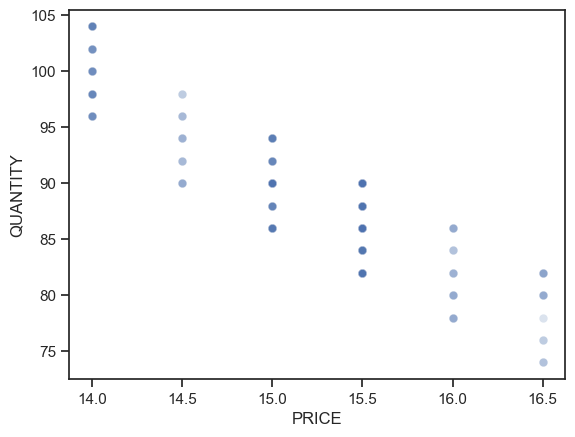

In [82]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Wed, 07 May 2025   Prob (F-statistic):          5.51e-153
Time:                        17:44:09   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 1200x800 with 0 Axes>

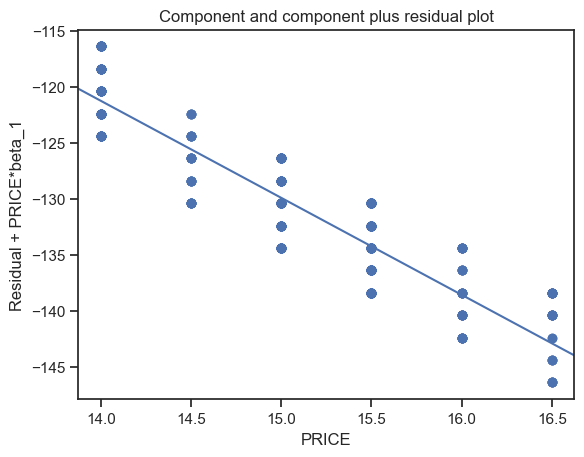

In [83]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

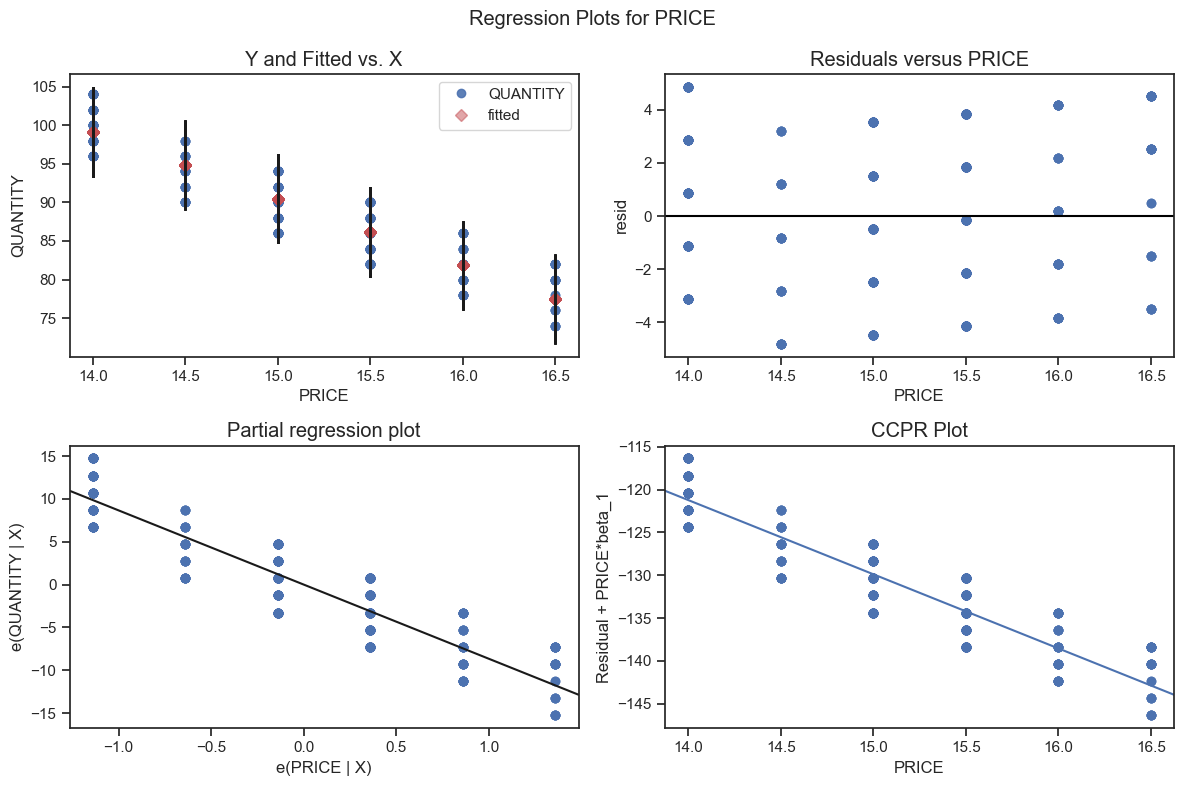

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
837,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
838,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
839,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
840,2051,2,BURGER,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
841,2051,2,BURGER,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

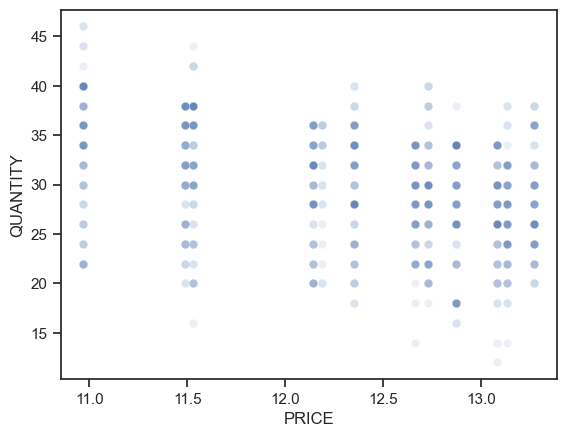

In [64]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Wed, 07 May 2025   Prob (F-statistic):           4.45e-27
Time:                        17:42:42   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

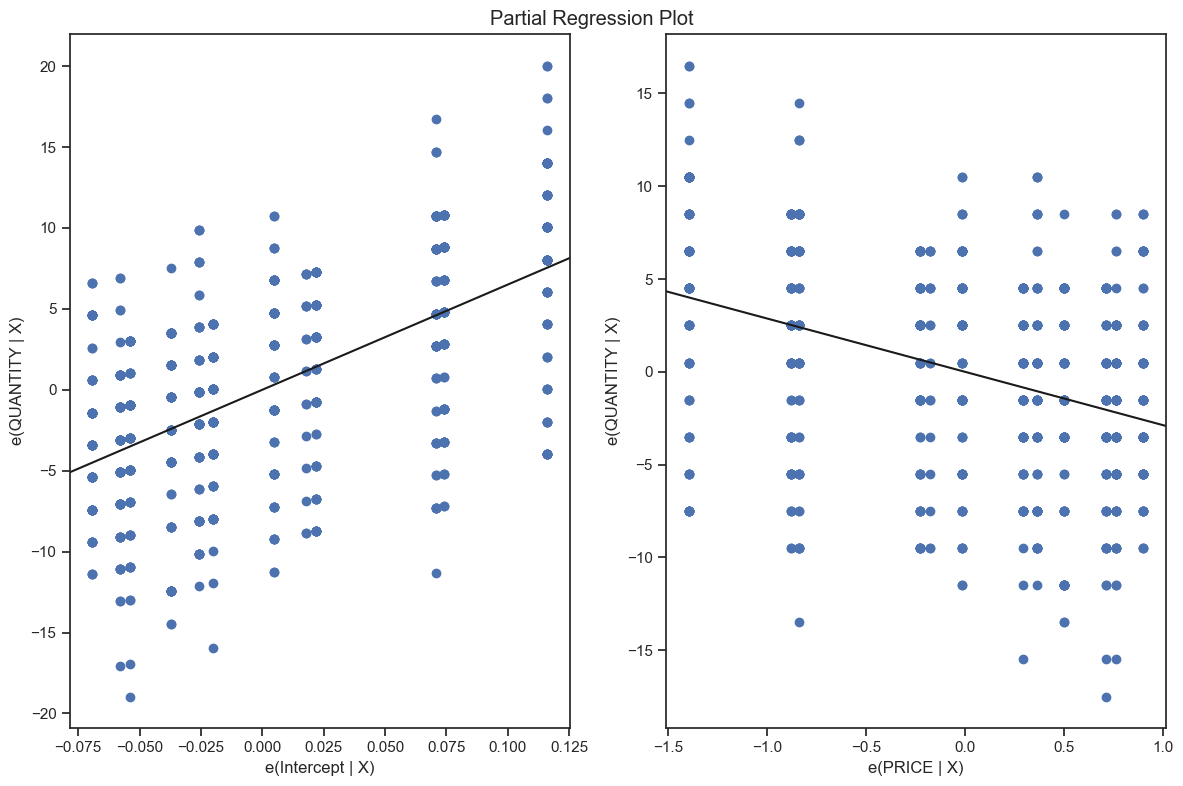

In [65]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1674,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
1675,2051,2,COKE,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
1676,2051,2,COKE,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
1677,2051,2,COKE,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
1678,2051,2,COKE,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


(1674, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

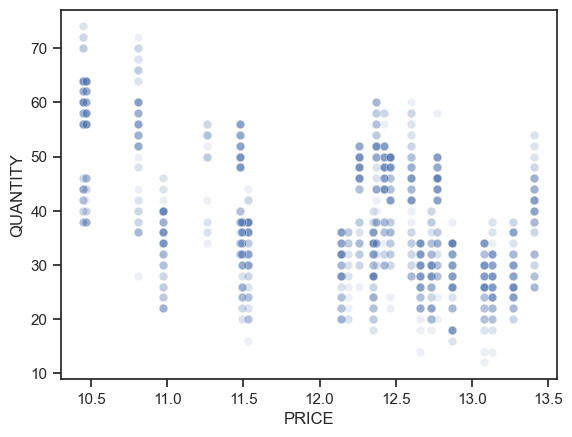

In [66]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Wed, 07 May 2025   Prob (F-statistic):          1.94e-104
Time:                        17:44:22   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

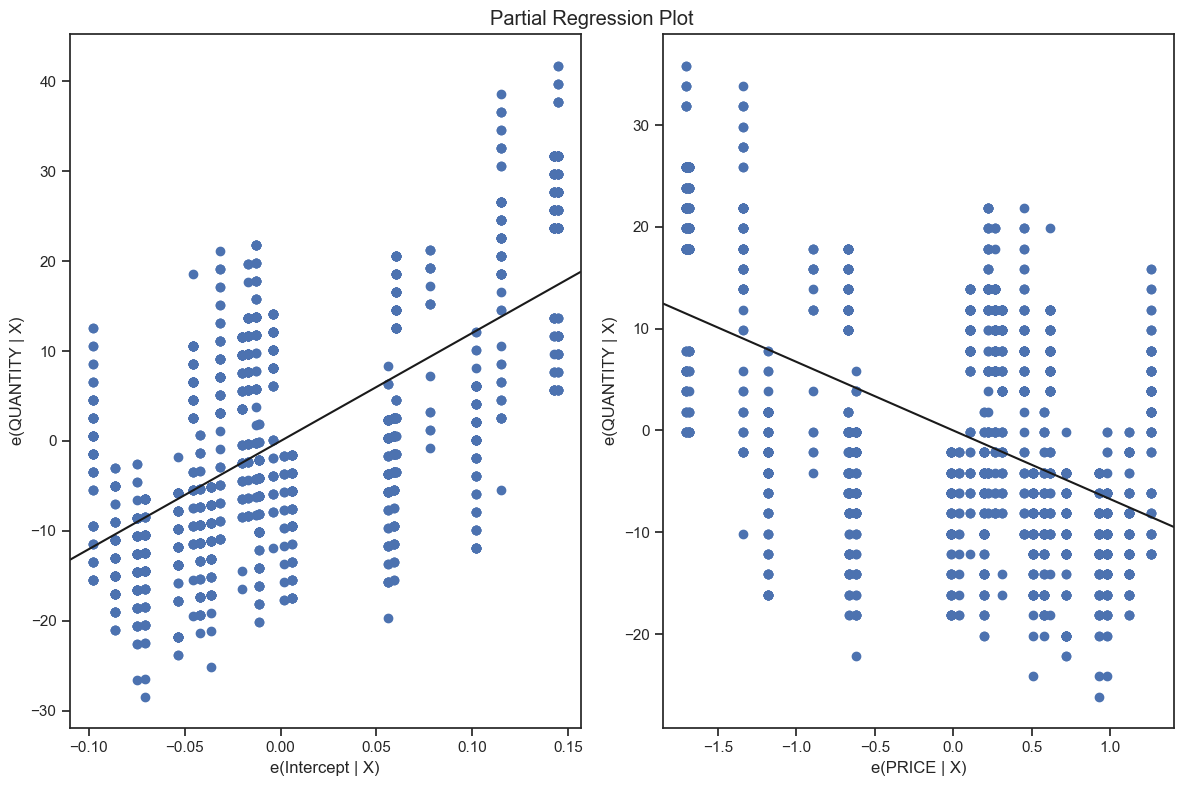

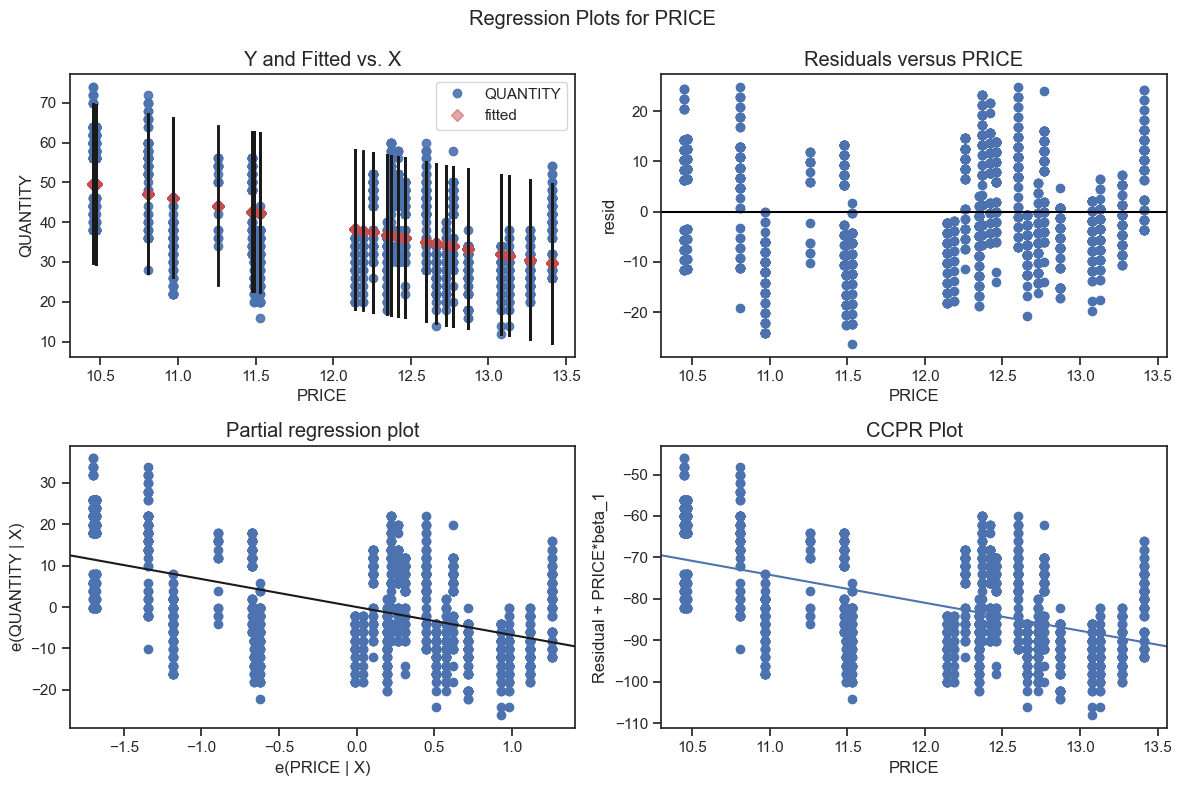

In [84]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
5022,2053,2,COFFEE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
5023,2053,2,COFFEE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
5024,2053,2,COFFEE,1/13/14,12.37,60,2014,No Holiday,0,0,28.4,0
5025,2053,2,COFFEE,1/13/15,10.81,66,2015,No Holiday,0,0,28.4,0
5026,2053,2,COFFEE,1/14/12,12.60,42,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2053.0,2.0,11.934636,46.802867,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.947643,9.909910,1.063043,0.451373,0.400776,20.005316,0.327324
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,40.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,48.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.0,2.0,12.600000,54.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

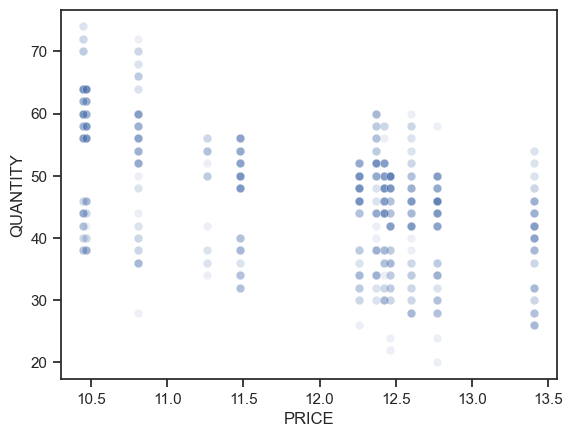

In [85]:
df = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Wed, 07 May 2025   Prob (F-statistic):           6.20e-62
Time:                        17:44:31   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

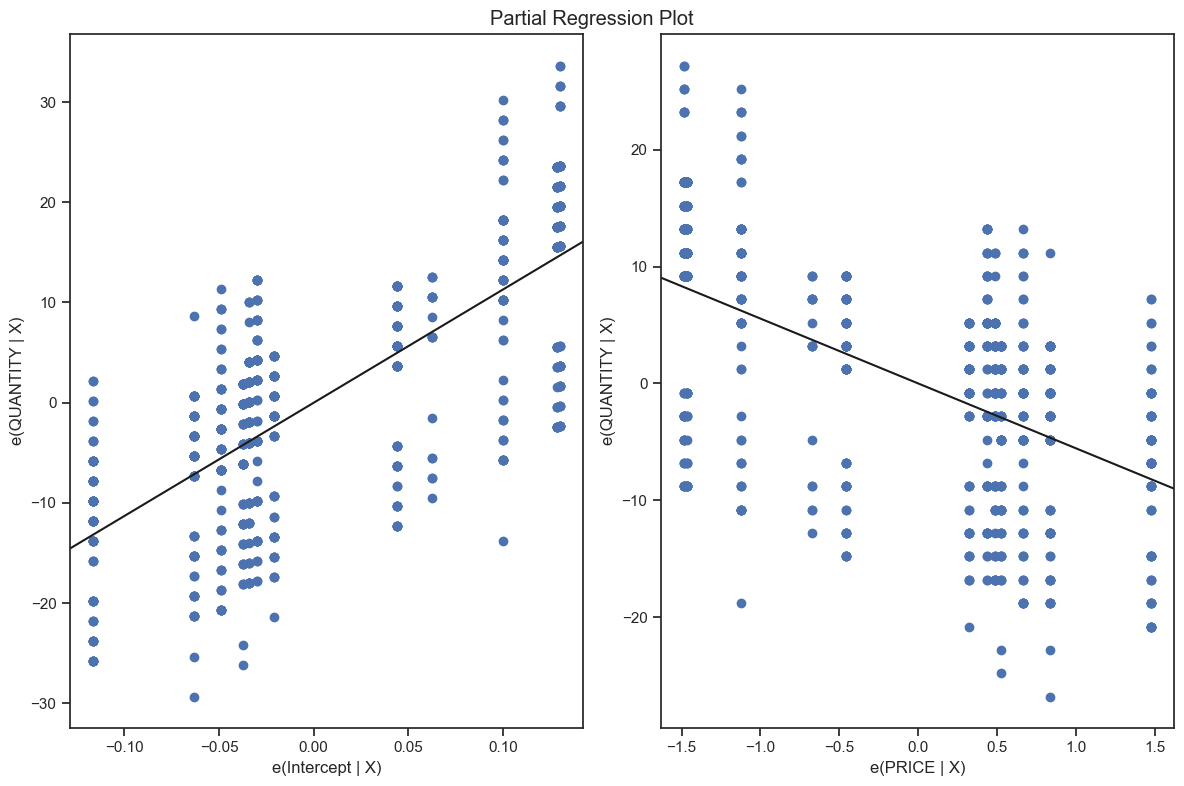

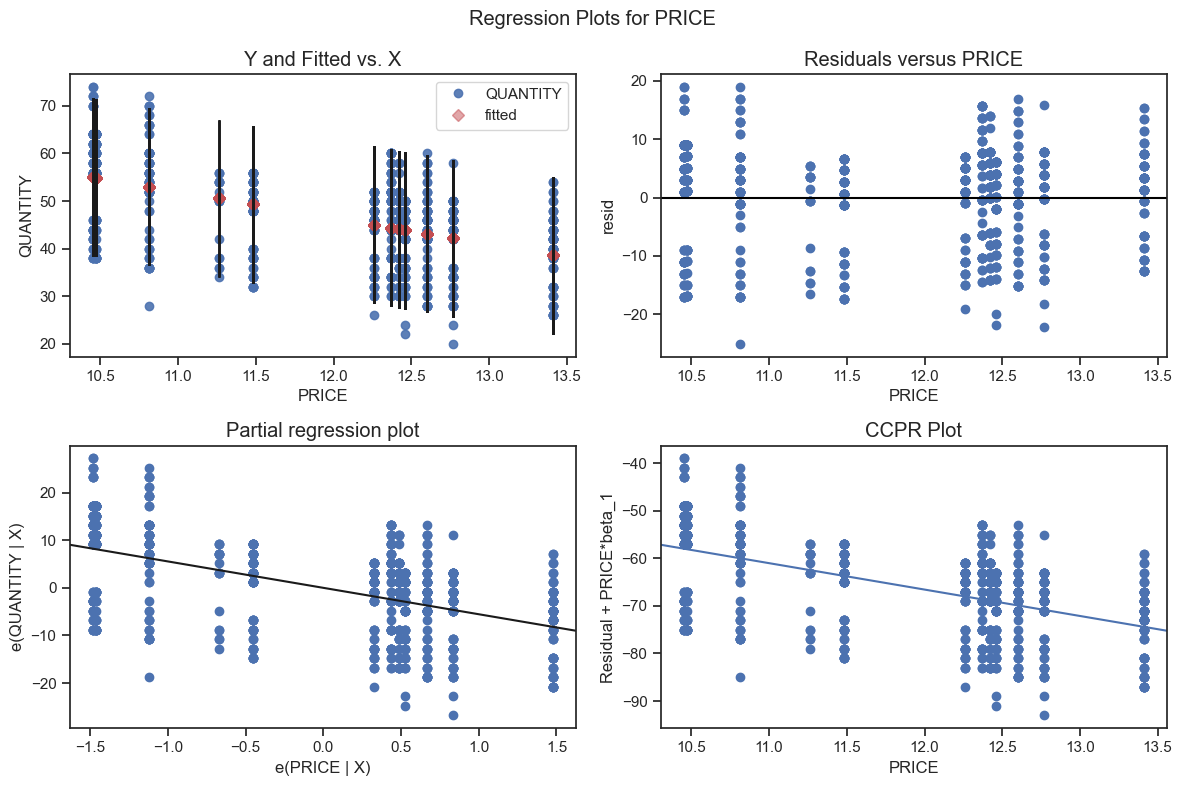

In [86]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3348,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
3349,2052,2,LEMONADE,1/13/13,12.64,18,2013,No Holiday,1,0,30.2,0
3350,2052,2,LEMONADE,1/13/14,11.96,24,2014,No Holiday,0,0,28.4,0
3351,2052,2,LEMONADE,1/13/15,11.45,28,2015,No Holiday,0,0,28.4,0
3352,2052,2,LEMONADE,1/14/12,12.75,20,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2052.0,2.0,11.976918,20.910394,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.820698,4.514501,1.063043,0.451373,0.400776,20.005316,0.327324
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,12.850000,34.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

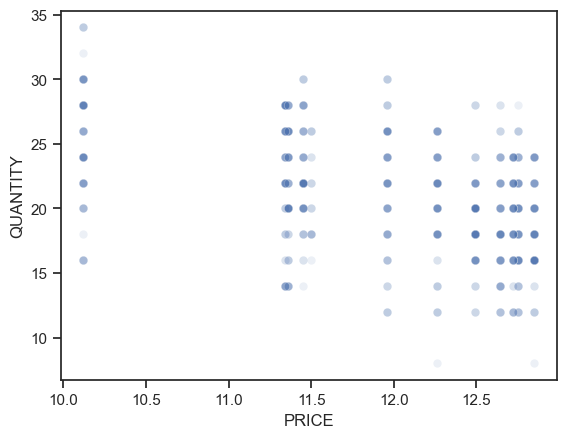

In [87]:
df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 07 May 2025   Prob (F-statistic):           7.46e-46
Time:                        17:44:46   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

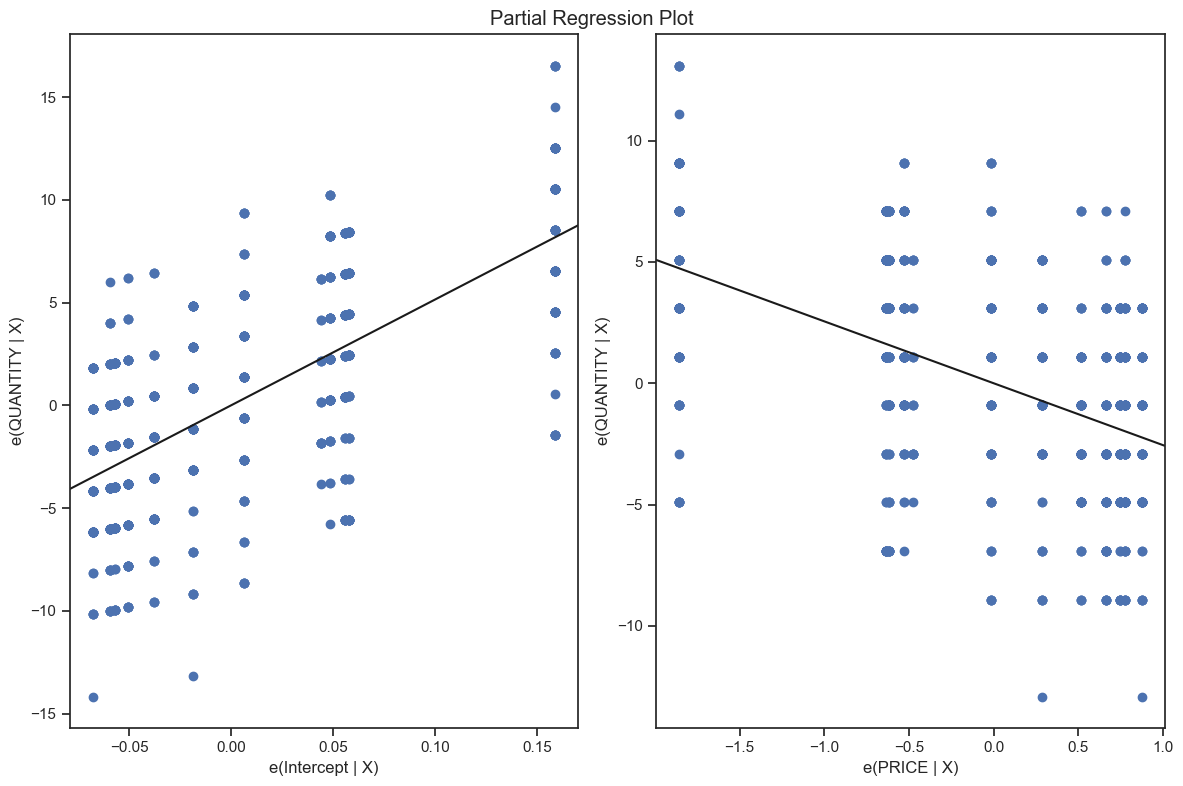

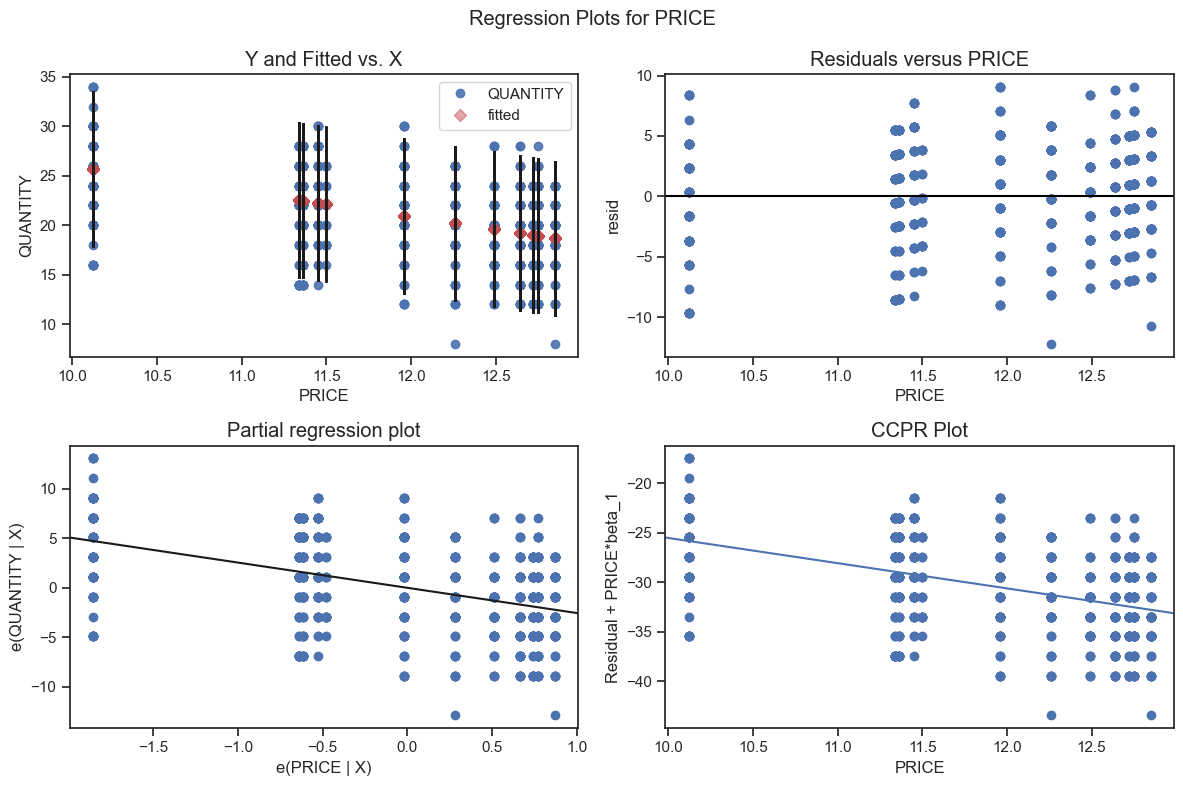

In [88]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [89]:
elasticities = {}

In [90]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -8.658581488470572
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Wed, 07 May 2025   Prob (F-statistic):          5.51e-153
Time:                        17:44:59   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


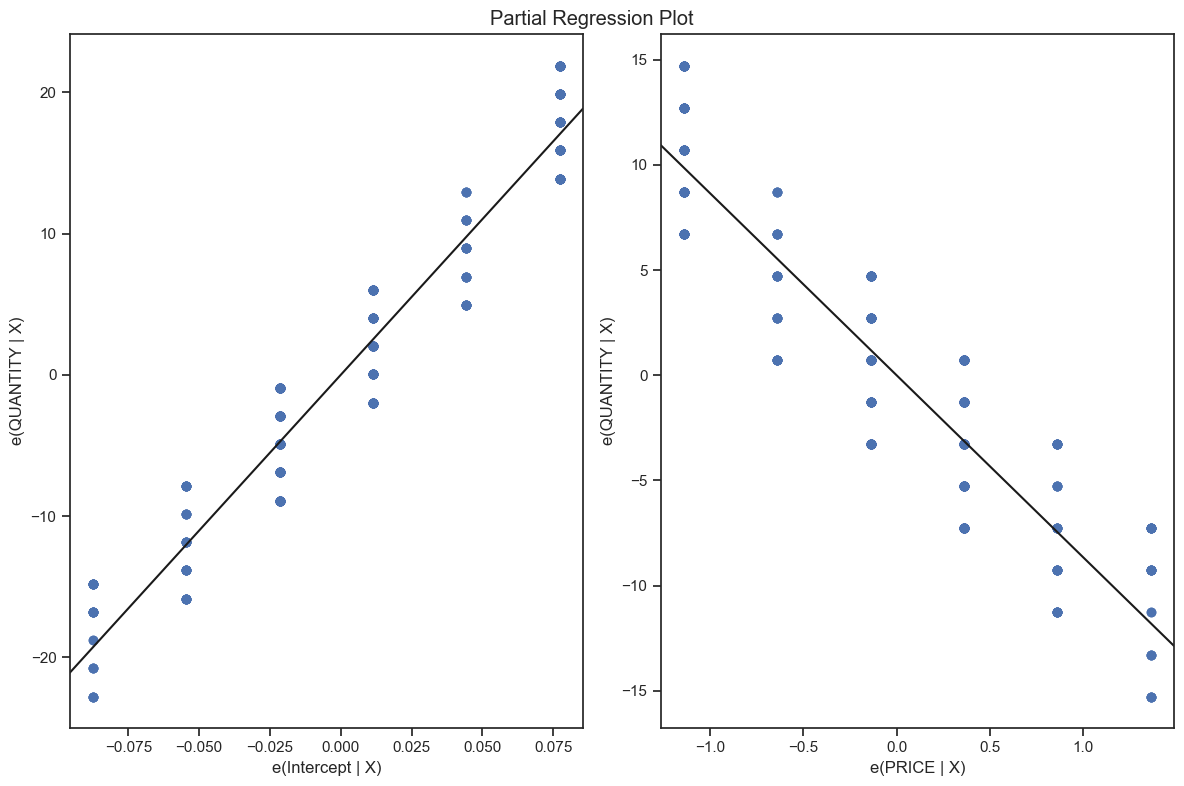

In [91]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -3.618990615456311
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.34e-58
Time:                        17:49:43   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


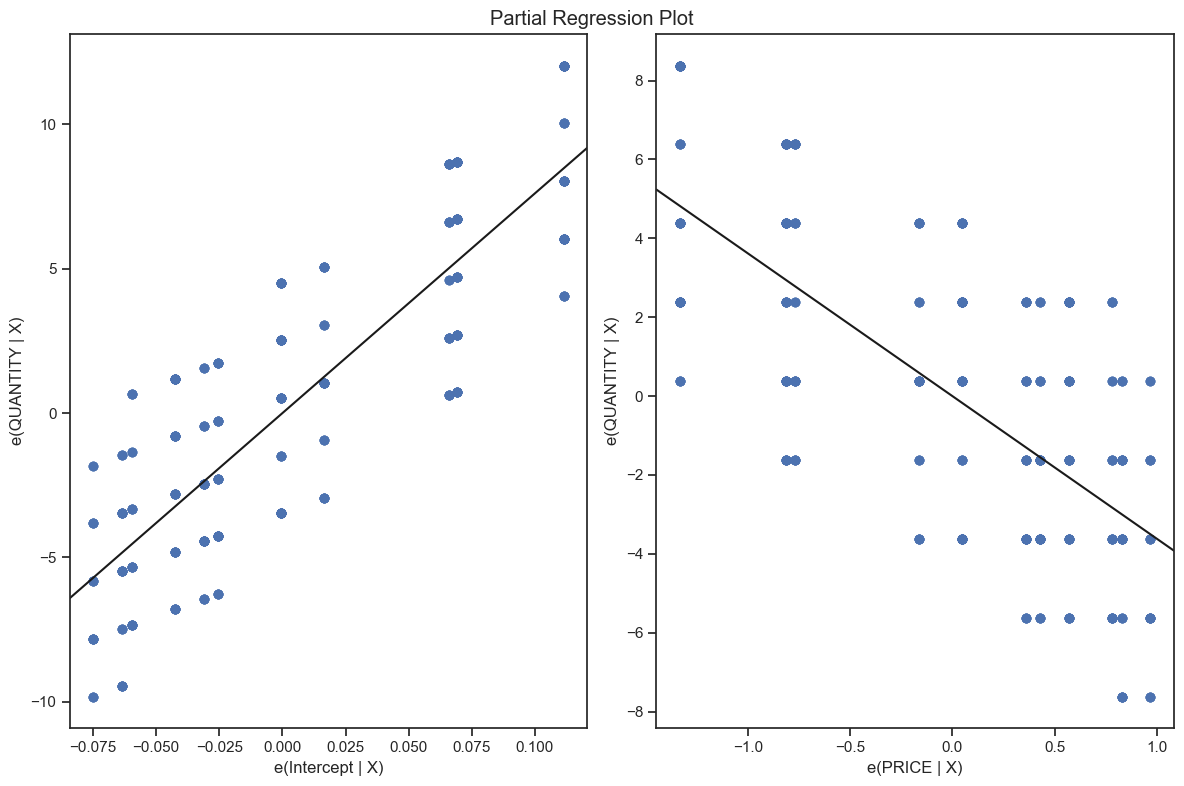

In [92]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -2.85670298455996
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Wed, 07 May 2025   Prob (F-statistic):           5.32e-53
Time:                        17:49:47   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

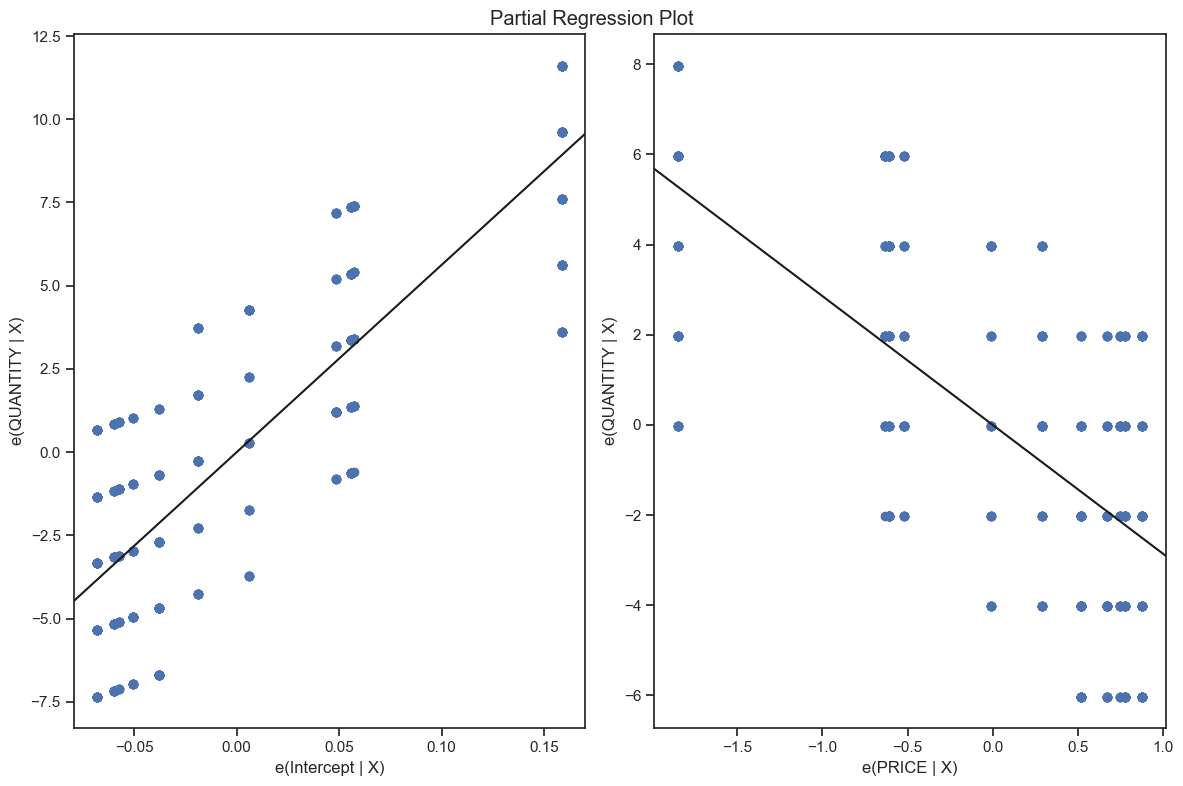

In [93]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticity of the product: -6.164156666230161
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Wed, 07 May 2025   Prob (F-statistic):          3.72e-152
Time:                        17:49:50   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


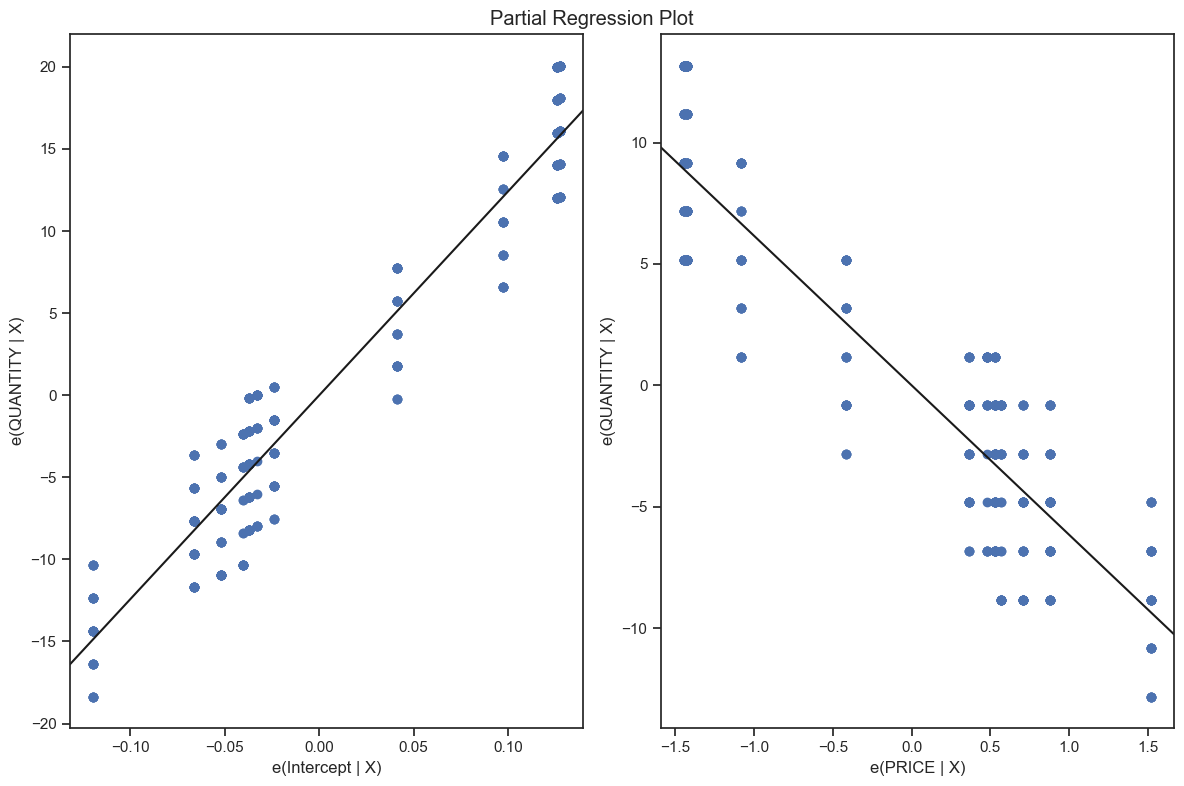

In [94]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

Price elasticity of the product: -7.460103485084987
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Wed, 07 May 2025   Prob (F-statistic):           2.00e-82
Time:                        17:49:54   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(np.float64(-7.460103485084987),
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1cdf711bcb0>)

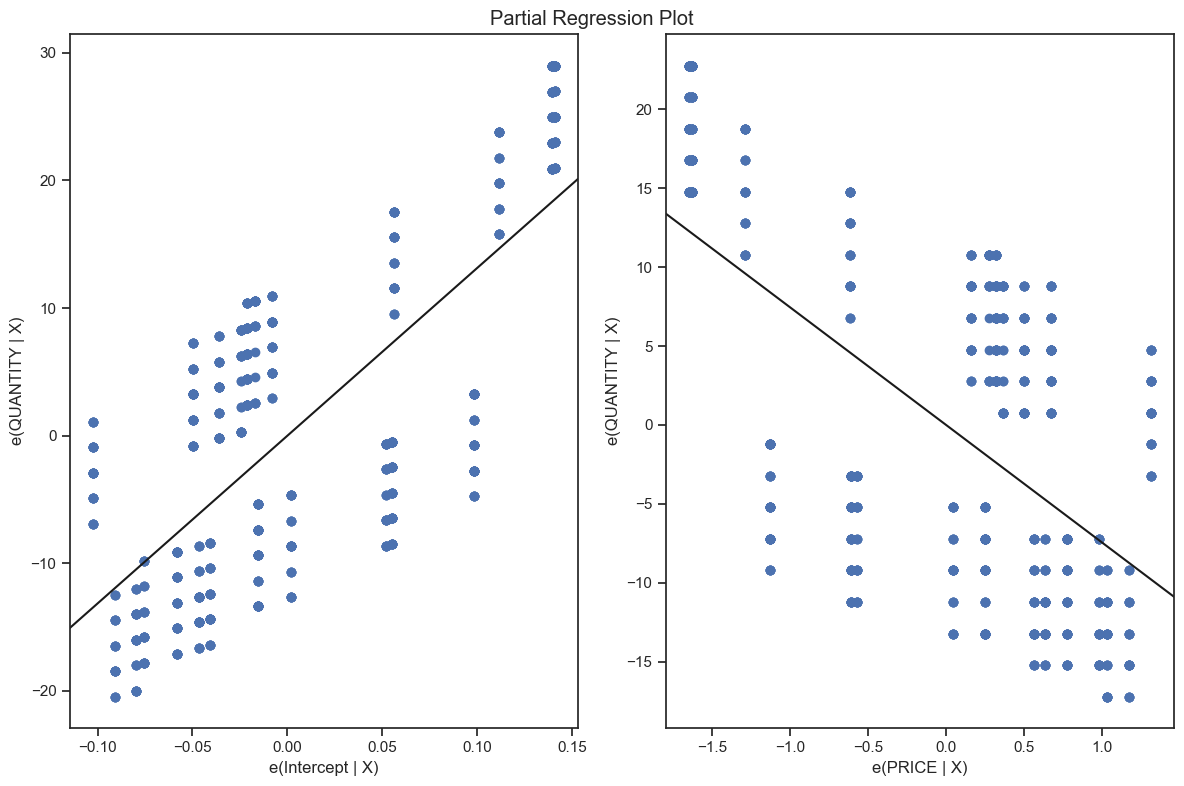

In [95]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

### 2 Coke

In [99]:
coke_data = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 3067)]
elasticities['coke_3067'], model_coke_2053 = create_model_and_find_elasticity(coke_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [100]:
coke_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


Price elasticity of the product: -6.164156666230161
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Wed, 07 May 2025   Prob (F-statistic):          3.72e-152
Time:                        17:50:25   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


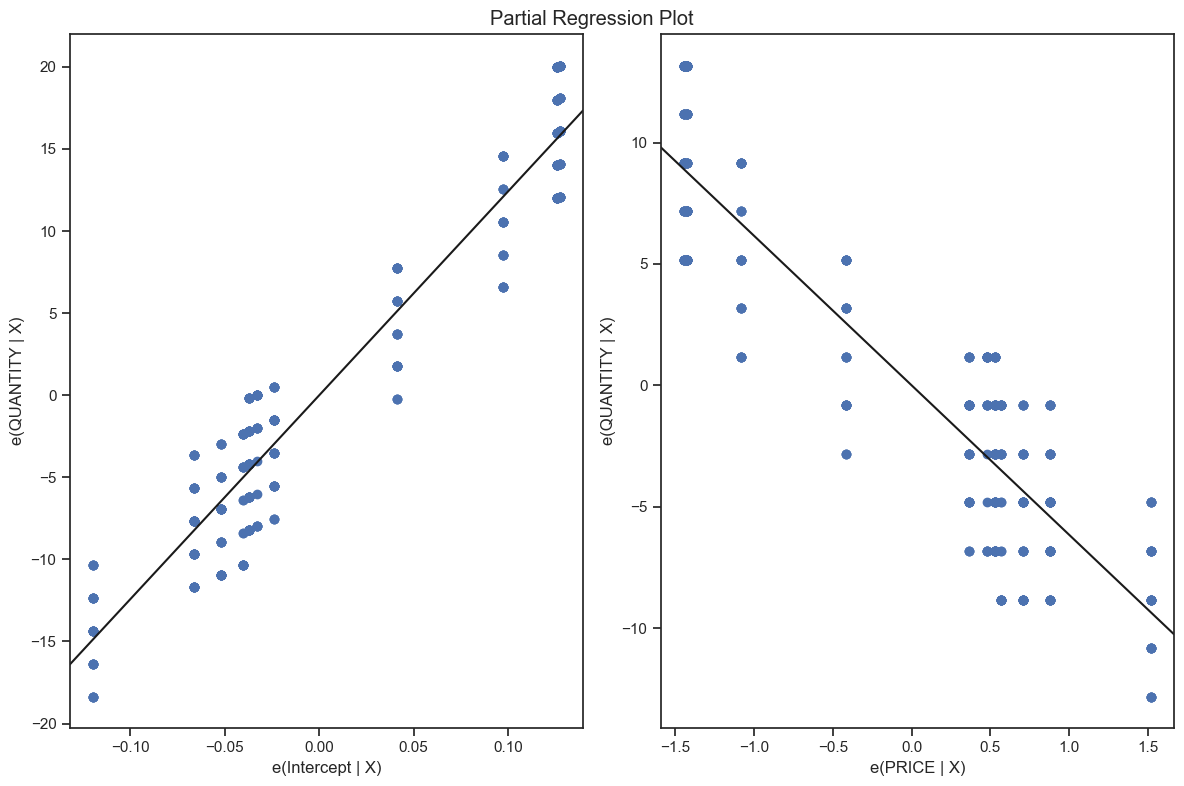

In [98]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -3.618990615456311
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.34e-58
Time:                        17:51:51   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


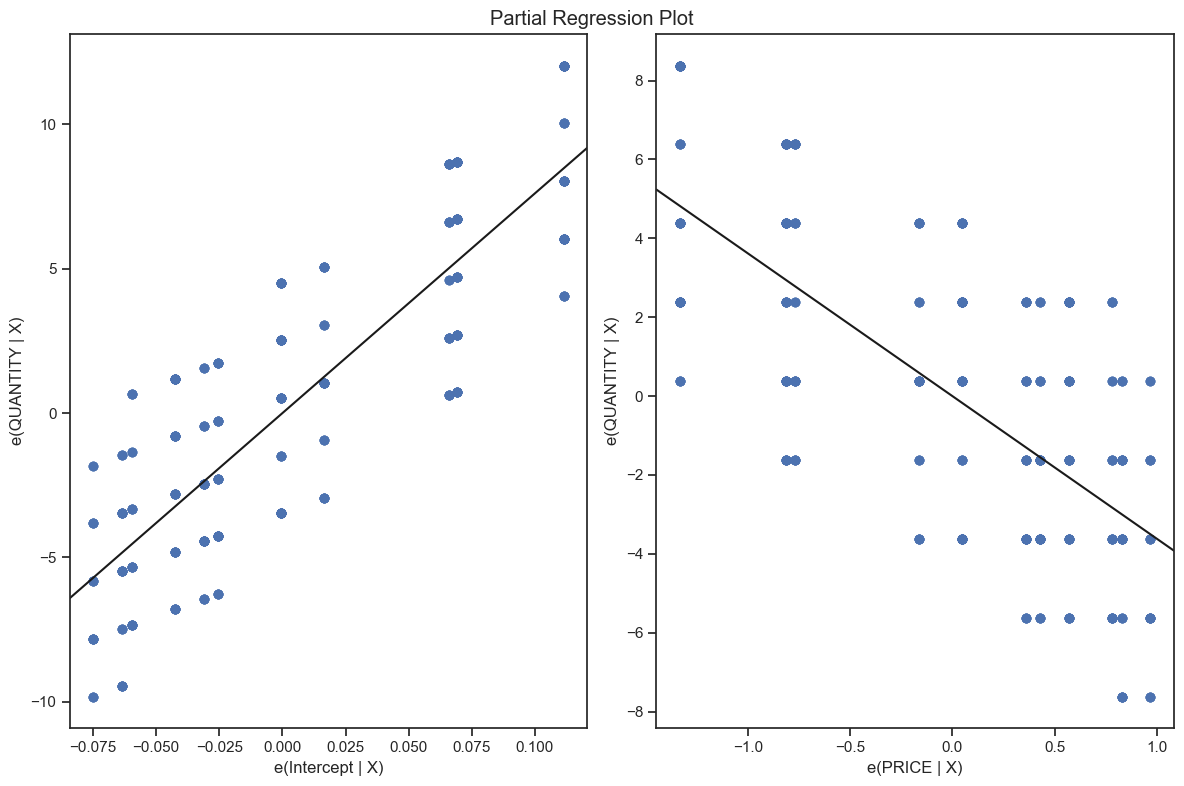

In [101]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

Price elasticity of the product: -2.85670298455996
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Wed, 07 May 2025   Prob (F-statistic):           5.32e-53
Time:                        17:51:56   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

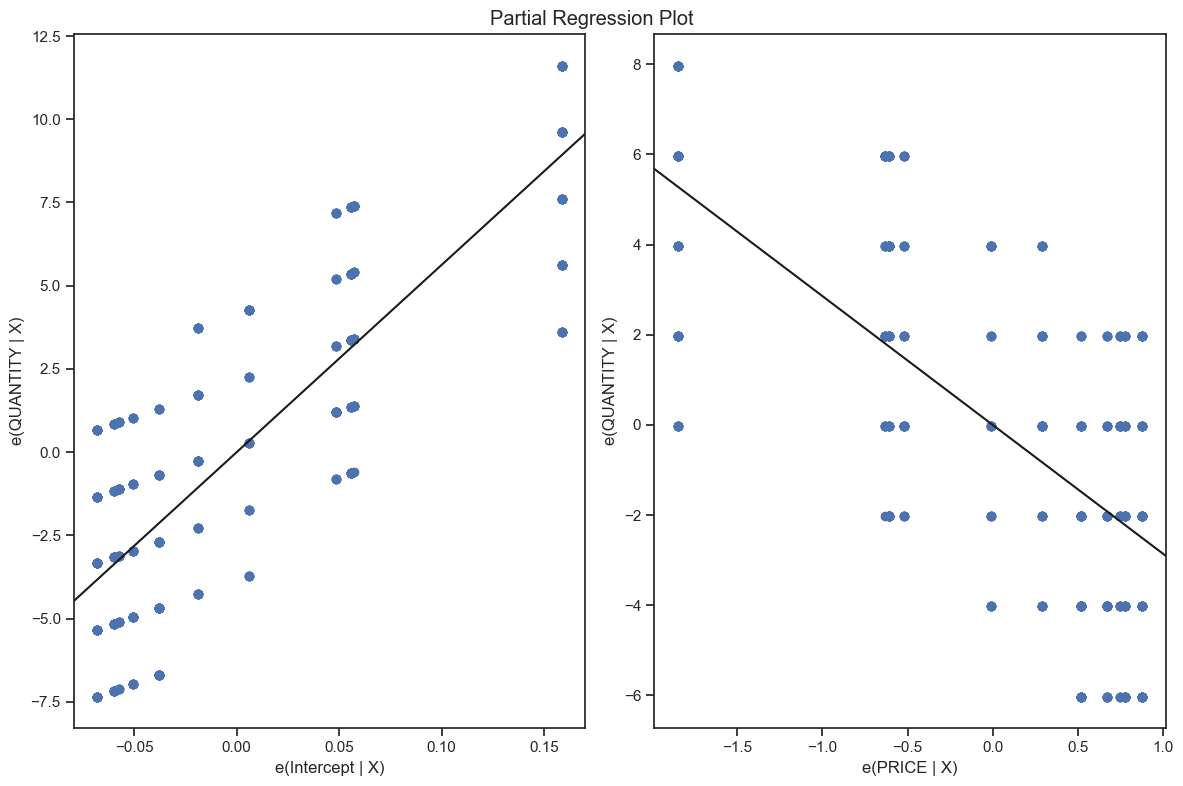

In [102]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

In [103]:
lemonade_data_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 3028)]
elasticities['lemonade_3028'], model_lemonade_3028 = create_model_and_find_elasticity(lemonade_data_3028)

ValueError: zero-size array to reduction operation maximum which has no identity

Price elasticity of the product: -6.164156666230161
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Wed, 07 May 2025   Prob (F-statistic):          3.72e-152
Time:                        17:52:03   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


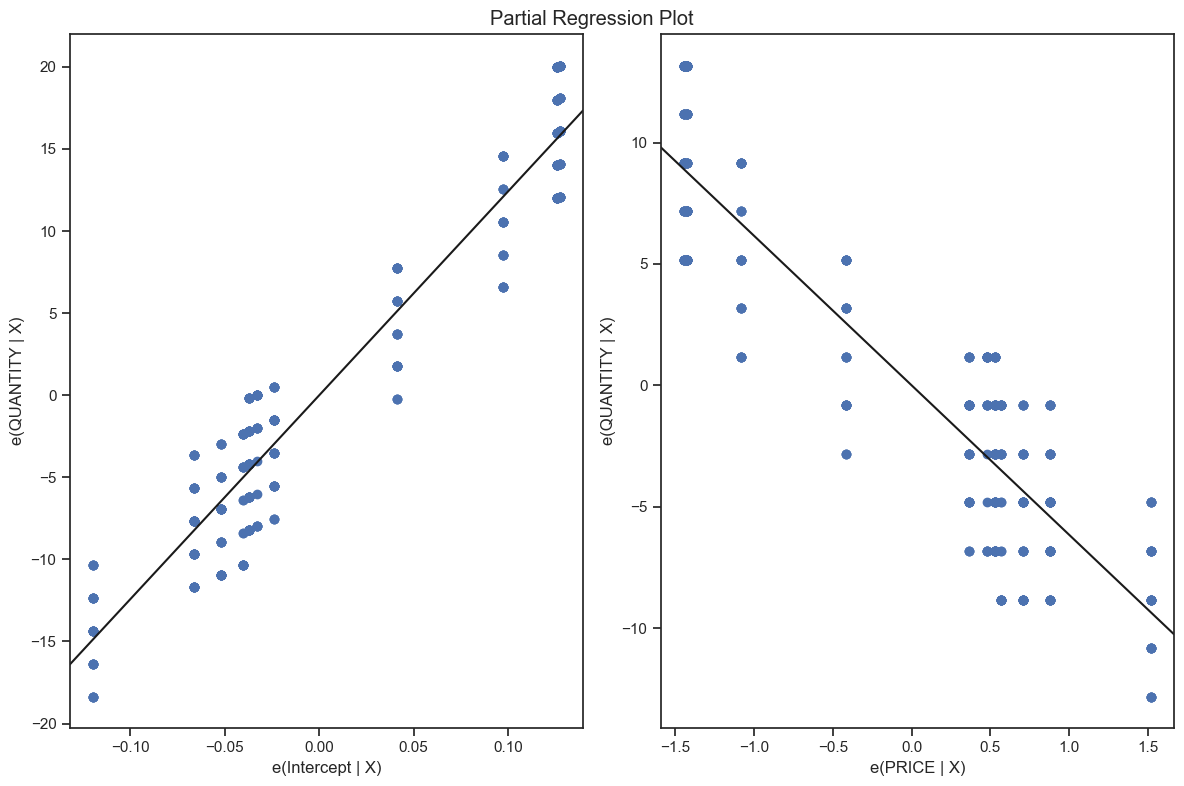

In [104]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

In [105]:
coffee_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 3055)]
elasticities['coffee_3055'], model_coffee_3055 = create_model_and_find_elasticity(coffee_data_3055)

ValueError: zero-size array to reduction operation maximum which has no identity

In [135]:
import pickle

file_path = '../models/burger_1070.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_burger_1070, f)

file_path = '../models/burger_2051.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_burger_2051, f)


file_path = '../models/burger_2052.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_burger_2052, f)

file_path = '../models/burger_2053.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_burger_2053, f)

file_path = '../models/coke_2053.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_coke_2053, f)


file_path = '../models/coke_2051.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_coke_2051, f)

file_path = '../models/lemonade_2052.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_lemonade_2052, f)


file_path = '../models/coffee_2053.pkl'

# Lưu mô hình
with open(file_path, 'wb') as f:
    pickle.dump(model_coffee_2053, f)

## Liệt kê các mặt hàng và độ co giãn theo giá của chúng trong một bảng.

In [106]:
elasticities

{'burger_1070': np.float64(-8.658581488470572),
 'burger_2051': np.float64(-3.618990615456311),
 'burger_2052': np.float64(-2.85670298455996),
 'burger_2053': np.float64(-6.164156666230161),
 'coke_2053': np.float64(-6.164156666230161),
 'coke_2051': np.float64(-3.618990615456311),
 'lemonade_2052': np.float64(-2.85670298455996),
 'coffee_2053': np.float64(-6.164156666230161)}

## Find optimal price for maximum profit

In [107]:
coke_data = coke_data_2053

In [108]:
coke_data.PRICE.min()

np.float64(10.45)

In [109]:
coke_data.PRICE.max()

np.float64(13.41)

Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is the selling price

In [110]:
buying_price_coke = 9

$$coke data.PROFIT = (coke data.PRICE - buying price coke) * coke data.QUANTITY$$
#### Let's see the profit for various price points:

In [111]:
start_price = 9.5
end_price = 20

In [112]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [113]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [114]:
test['QUANTITY'] = model_coke_2053.predict(test['PRICE'])

In [115]:
test

,PRICE,QUANTITY
0,9.50,65.582225
1,9.51,65.520583
2,9.52,65.458942
3,9.53,65.397300
4,9.54,65.335659
...,...,...
1045,19.95,1.166788
1046,19.96,1.105146
1047,19.97,1.043505
1048,19.98,0.981863


In [116]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

In [117]:
test

,PRICE,QUANTITY,PROFIT
0,9.50,65.582225,32.791112
1,9.51,65.520583,33.415498
2,9.52,65.458942,34.038650
3,9.53,65.397300,34.660569
4,9.54,65.335659,35.281256
...,...,...,...
1045,19.95,1.166788,12.776326
1046,19.96,1.105146,12.112402
1047,19.97,1.043505,11.447246
1048,19.98,0.981863,10.780856


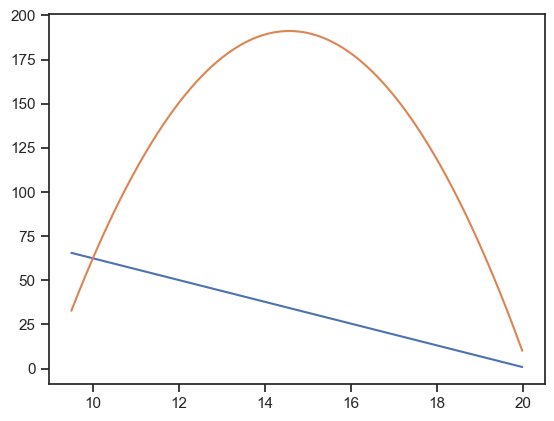

In [118]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

Let's find the exact price at which maximum profit is gained:

In [119]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [120]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
507,14.57,34.329951,191.217825


In [121]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit


## Tính giá tối ưu cho tất cả các mặt hàng và liệt kê trong bảng.

In [122]:
optimal_price = {}
buying_price = 9

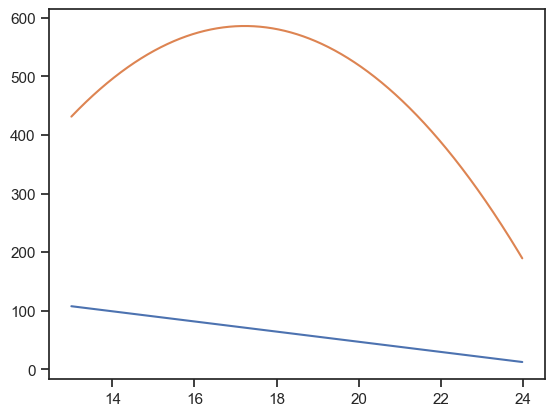

In [123]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [124]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572}

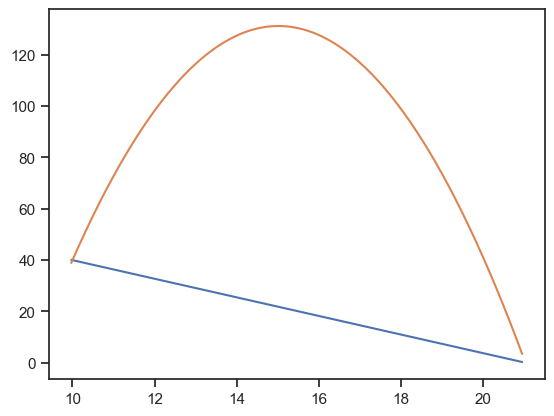

In [125]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

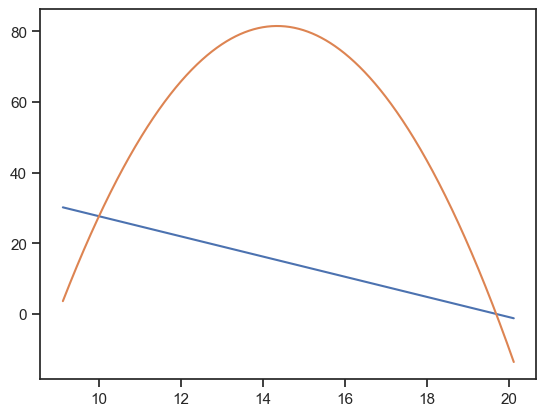

In [126]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

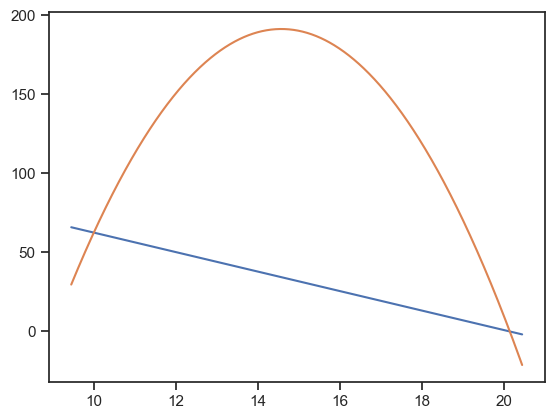

In [127]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

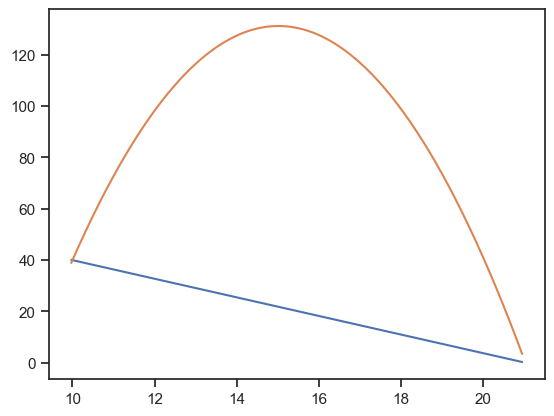

In [128]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

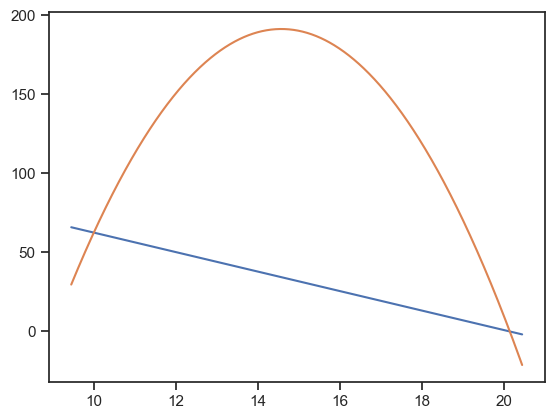

In [129]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

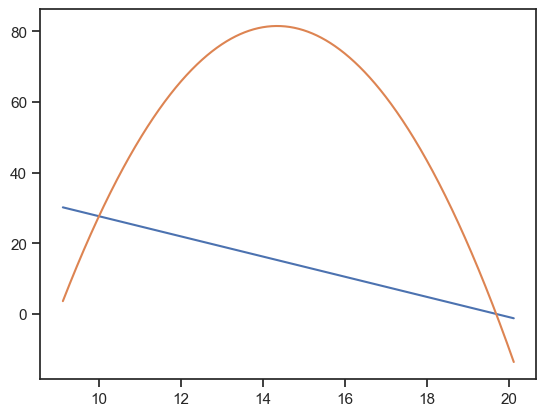

In [130]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

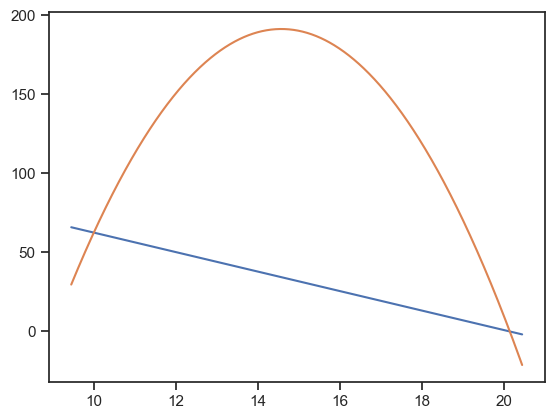

In [131]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_data_2053, model_coffee_2053, buying_price)

In [132]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825}

In [133]:
coke_data_2051.PRICE.describe()

count    416.000000
mean      12.301562
std        0.730620
min       10.970000
25%       11.530000
50%       12.350000
75%       12.870000
max       13.270000
Name: PRICE, dtype: float64

## Kết luận

### Đây là mức giá mà quán cà phê nên đặt cho các mặt hàng để đạt được lợi nhuận tối đa dựa trên dữ liệu bán hàng trước đó. Lưu ý rằng điều này áp dụng cho những ngày bình thường, không phải ngày lễ. Vào những ngày khác, hành vi và mô hình mua sắm của khách hàng có thể khác biệt. Những ngày này thường sẽ chứng kiến sự gia tăng tiêu dùng ngay cả khi giá tăng. Do đó, chúng cần được xử lý (và mô hình hóa) riêng biệt. Tương tự, điều quan trọng là phải loại bỏ bất kỳ ảnh hưởng bên ngoài nào khác ngoài giá có thể ảnh hưởng đến hành vi mua hàng của khách hàng, bao gồm các dữ liệu như khi sản phẩm được giảm giá, thời tiết xấu, ...

#### Khi các mức giá mới đã được thiết lập, quán cà phê cần liên tục theo dõi doanh số và lợi nhuận. Là một phần của thực tiễn kinh doanh liên tục, nên tạo một bảng điều khiển để cung cấp thông tin chi tiết và đánh giá các chỉ số hiệu suất kinh doanh.